In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch

from bev2seg_2 import Raw2Seg_BEV, Raw_BEV2Seg
from evaluate_segformer import plot_mean_iou_per_class

In [2]:
RAW2SEGMODEL_PATH  = "../models/segformer_nu_formatted/raw2seg_bev_v0.2"
BEV2SEGMODEL_PATH  = "../models/segformer_bev/raw2bevseg_v0.3"
DATA_PATH = "../data/mean_iou.pt"

In [3]:
# Load Models
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

raw2seg_bev = Raw2Seg_BEV(RAW2SEGMODEL_PATH, None, device=device)
raw_seg2bev = Raw_BEV2Seg(BEV2SEGMODEL_PATH, None, device=device)

# Load data
labels_list = list(raw2seg_bev.id2label.values())
with open(DATA_PATH, "rb") as f:
    data = pickle.load(f)


Using device: cuda


In [4]:
def plot_all_mean_ious(mean_iou_per_class: dict, title='mean_iou_per_class', labels_list=None):
    if labels_list is None:
        labels_list = range(len(mean_iou_per_class))

    colors = ["skyblue", "lime", "purple"]
    num_algorithms = len(mean_iou_per_class)
    width = 0.25  # Ancho de las barras

    plt.figure(figsize=(10, 6))
    plt.title(title)

    x = np.arange(len(labels_list))
    for i, (label, data) in enumerate(mean_iou_per_class.items()):
        # Desplazamos las barras para cada algoritmo en el eje x
        plt.bar(x + i * width - (width * (num_algorithms - 1)) / 2, data, color=colors[i], label=label, width=width, alpha=0.6)

    plt.xlabel('Classes')
    plt.xticks(x, labels_list, rotation=90)
    plt.ylabel('IoU')
    plt.legend(loc = "upper center")
    plt.show()

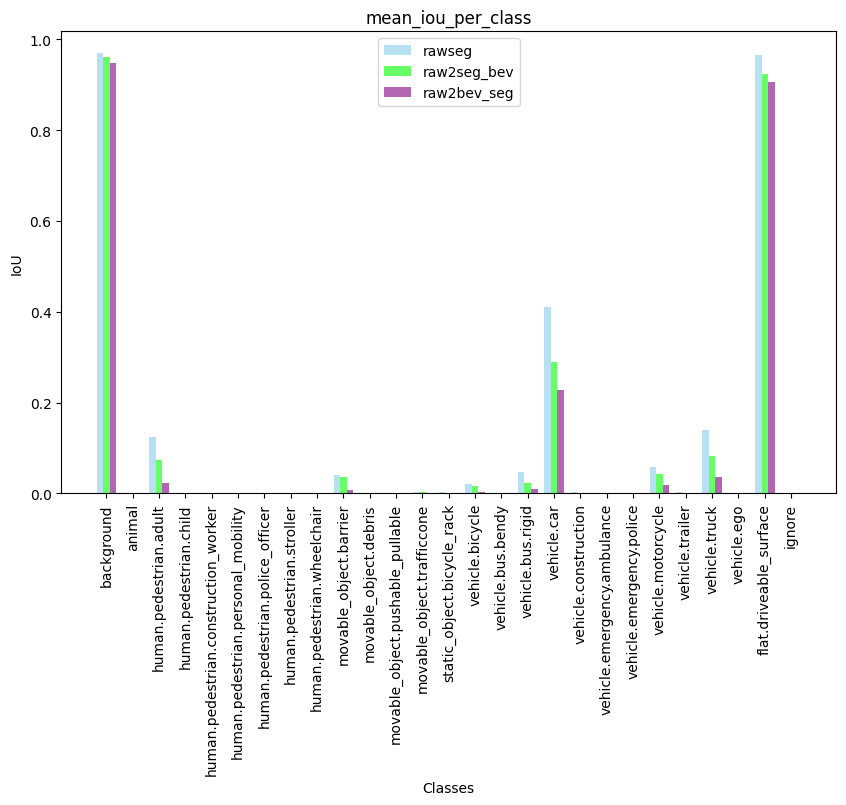

In [5]:
plot_all_mean_ious(data['mean_iou_per_class'], 'mean_iou_per_class', labels_list=labels_list)

# RAW -> SEG

0.12107202969491482


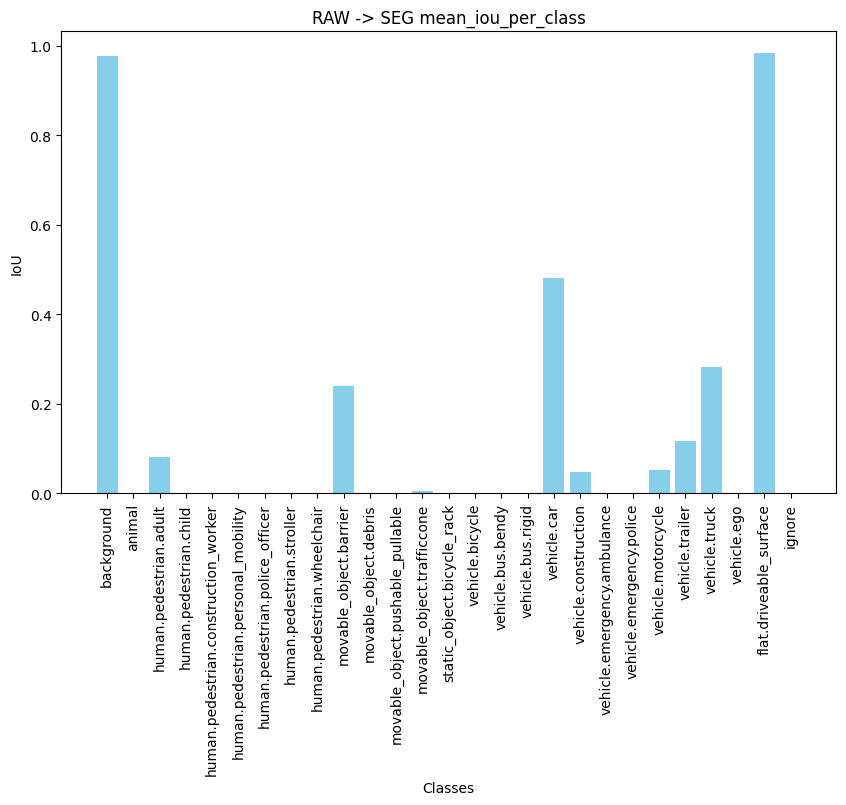

In [21]:
print(data['mean_iou']['rawseg'])
plot_mean_iou_per_class(data['mean_iou_per_class']['rawseg'], 'RAW -> SEG mean_iou_per_class', labels_list=labels_list)

# RAW -> SEG -> BEV

0.10714796930551529


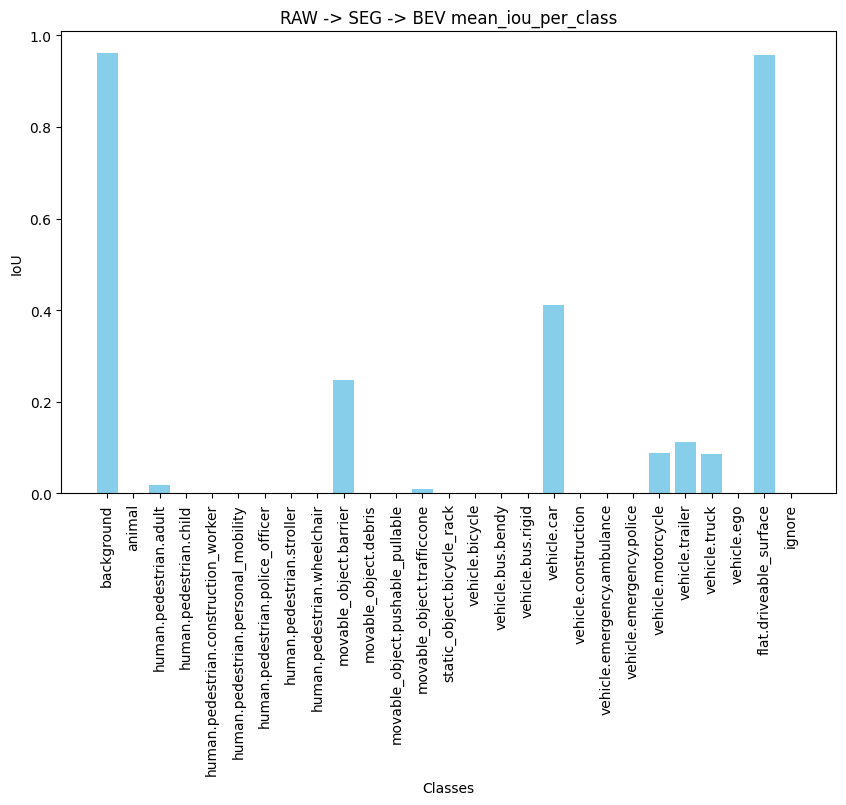

In [24]:
print(data['mean_iou']['raw2seg_bev'])
plot_mean_iou_per_class(data['mean_iou_per_class']['raw2seg_bev'], 'RAW -> SEG -> BEV mean_iou_per_class', labels_list=labels_list)

# RAW -> BEV -> SEG

0.10051837284117937


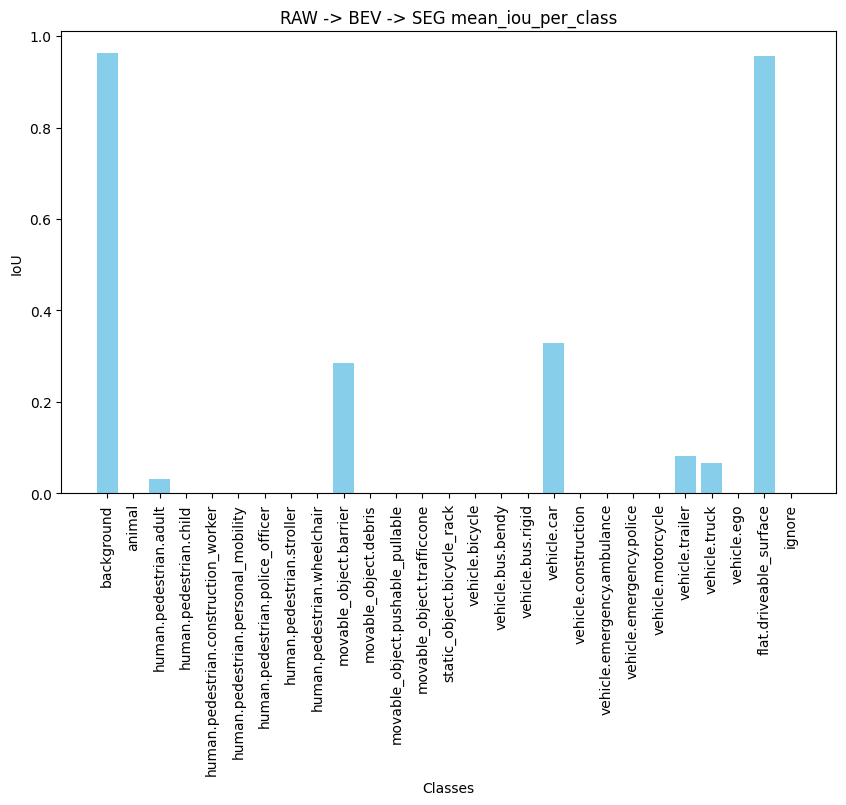

In [23]:
print(data['mean_iou']['raw2bev_seg'])
plot_mean_iou_per_class(data['mean_iou_per_class']['raw2bev_seg'], 'RAW -> BEV -> SEG mean_iou_per_class', labels_list=labels_list)